In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[Blog](https://medium.com/analytics-vidhya/classifying-cifar-10-using-a-simple-cnn-4e9a6dd7600b)

In [2]:
data=tf.keras.datasets.cifar10.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 7s 0us/step


In [3]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
np.max(x_train)

255

In [6]:
np.min(x_train)

0

### Normalization: Min-Max

In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

### Image from each class

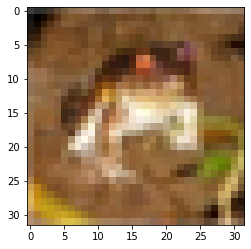

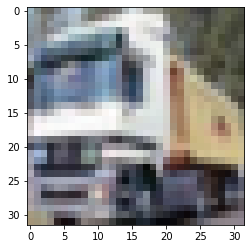

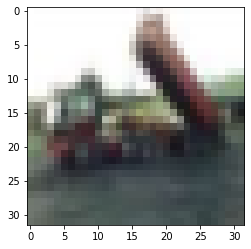

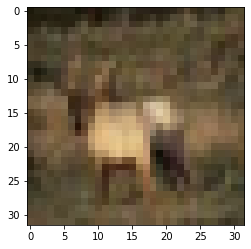

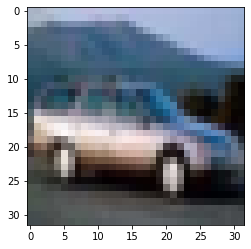

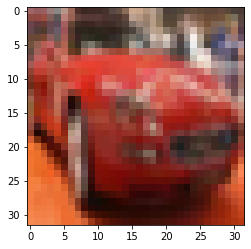

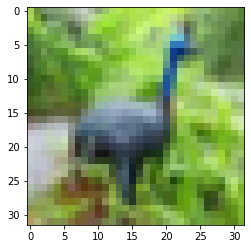

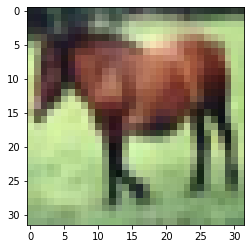

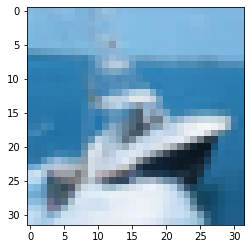

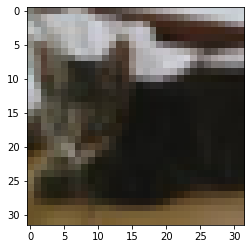

In [8]:
for i in np.unique(y_train):
     plt.imshow(x_train[i])
     plt.show()

### Architecture 1

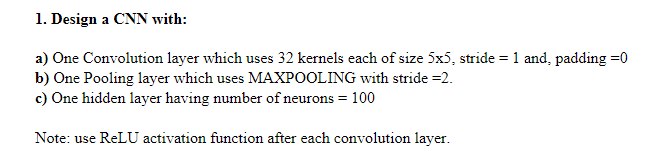

In [9]:
model=tf.keras.Sequential()

model.add(tf.keras.Input((32,32,3)))
model.add(tf.keras.layers.Conv2D(32, kernel_size= (5,5), activation = "relu" , padding = "valid"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides =  (2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation = "relu", name = "hiddenLayer1"))
model.add(tf.keras.layers.Dense(10, activation = "softmax", name = "outputLayer"))

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 hiddenLayer1 (Dense)        (None, 100)               627300    
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
__________________________________________________

In [11]:
batch_size=32
epochs=15

history = model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 16s 4ms/step - loss: 1.5436 - accuracy: 0.4428 - val_loss: 1.3710 - val_accuracy: 0.5086
Epoch 2/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2544 - accuracy: 0.5561 - val_loss: 1.2830 - val_accuracy: 0.5594
Epoch 3/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1284 - accuracy: 0.6043 - val_loss: 1.1302 - val_accuracy: 0.6142
Epoch 4/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0365 - accuracy: 0.6377 - val_loss: 1.1740 - val_accuracy: 0.6046
Epoch 5/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9726 - accuracy: 0.6632 - val_loss: 1.0766 - val_accuracy: 0.6356
Epoch 6/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9295 - accuracy: 0.6778 - val_loss: 1.0021 - val_accuracy: 0.6648
Epoch 7/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8847 - accuracy: 0.6942 - val_loss: 1.0065 - val_accuracy

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2946 - accuracy: 0.6140


[1.2946038246154785, 0.6140000224113464]

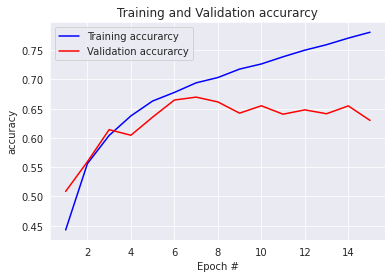

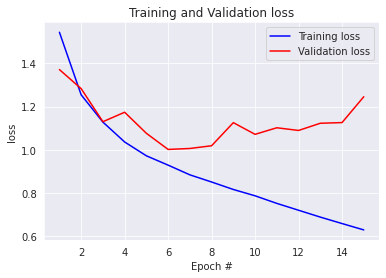

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()


plt.show()


### Architecture 2

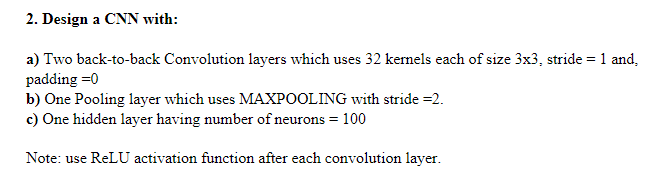

In [14]:
model2=tf.keras.Sequential()

model2.add(tf.keras.Input((32,32,3)))
model2.add(tf.keras.layers.Conv2D(32, kernel_size= (3,3), activation = "relu" , padding = "valid"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides =  (2, 2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(100, activation = "relu", name = "hiddenLayer1"))
model2.add(tf.keras.layers.Dense(10, activation = "softmax", name = "outputLayer"))

In [15]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 hiddenLayer1 (Dense)        (None, 100)               720100    
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
________________________________________________

In [16]:
batch_size=32
epochs=15

history2 = model2.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.4365 - accuracy: 0.4921 - val_loss: 1.2040 - val_accuracy: 0.5758
Epoch 2/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1473 - accuracy: 0.5970 - val_loss: 1.1078 - val_accuracy: 0.6150
Epoch 3/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0192 - accuracy: 0.6456 - val_loss: 1.1019 - val_accuracy: 0.6238
Epoch 4/15
1407/1407 [==============================] - 5s 3ms/step - loss: 0.9204 - accuracy: 0.6773 - val_loss: 1.0362 - val_accuracy: 0.6426
Epoch 5/15
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8299 - accuracy: 0.7107 - val_loss: 1.0514 - val_accuracy: 0.6436
Epoch 6/15
1407/1407 [==============================] - 5s 3ms/step - loss: 0.7650 - accuracy: 0.7319 - val_loss: 1.0368 - val_accuracy: 0.6522
Epoch 7/15
1407/1407 [==============================] - 5s 3ms/step - loss: 0.6906 - accuracy: 0.7590 - val_loss: 1.0171 - val_accuracy:

In [17]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6123 - accuracy: 0.6309


[1.6123147010803223, 0.6309000253677368]

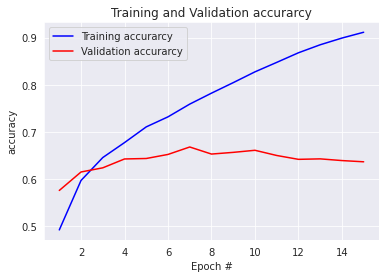

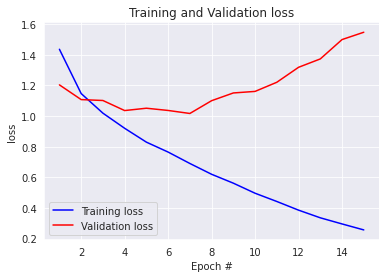

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history object
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()


plt.show()


### Architecture 3

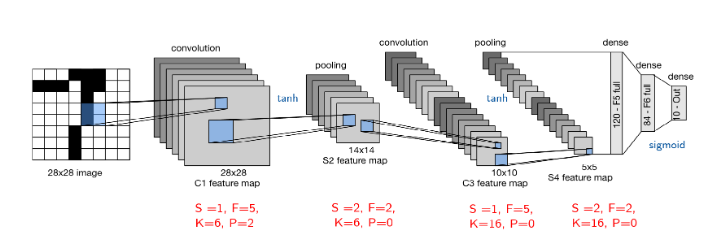

In [19]:
lenet5 = tf.keras.Sequential()
lenet5.add(tf.keras.Input(shape=(32,32,3)))
lenet5.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', padding="same", name="ConvolutionalLayer1"))
lenet5.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, name="AveragePooling1"))
lenet5.add(tf.keras.layers.Conv2D(16,kernel_size=(5, 5), activation='tanh', name="ConvolutionalLayer2"))
lenet5.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2, name="AveragePooling2"))
lenet5.add(tf.keras.layers.Flatten(name="Input"))
lenet5.add(tf.keras.layers.Dense(units=120, activation='tanh', name="HiddenLayer1"))
lenet5.add(tf.keras.layers.Dense(units=84, activation='tanh', name="HiddenLayer2"))
lenet5.add(tf.keras.layers.Dense(units=10, activation = 'softmax', name="Output"))

In [20]:
lenet5.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
lenet5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionalLayer1 (Conv2D  (None, 32, 32, 6)        456       
 )                                                               
                                                                 
 AveragePooling1 (AveragePoo  (None, 16, 16, 6)        0         
 ling2D)                                                         
                                                                 
 ConvolutionalLayer2 (Conv2D  (None, 12, 12, 16)       2416      
 )                                                               
                                                                 
 AveragePooling2 (AveragePoo  (None, 6, 6, 16)         0         
 ling2D)                                                         
                                                                 
 Input (Flatten)             (None, 576)              

In [21]:
batch_size=32
epochs=15
history3=lenet5.fit(x_train,y_train,batch_size=batch_size,epochs=epochs, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 6s 4ms/step - loss: 1.7979 - accuracy: 0.3652 - val_loss: 1.6731 - val_accuracy: 0.4084
Epoch 2/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5685 - accuracy: 0.4464 - val_loss: 1.5127 - val_accuracy: 0.4691
Epoch 3/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4372 - accuracy: 0.4916 - val_loss: 1.4457 - val_accuracy: 0.4871
Epoch 4/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3478 - accuracy: 0.5245 - val_loss: 1.4271 - val_accuracy: 0.4923
Epoch 5/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2830 - accuracy: 0.5458 - val_loss: 1.3837 - val_accuracy: 0.5129
Epoch 6/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2272 - accuracy: 0.5658 - val_loss: 1.3959 - val_accuracy: 0.5116
Epoch 7/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1771 - accuracy: 0.5828 - val_loss: 1.3908 - val_accuracy:

In [22]:
lenet5.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4361 - accuracy: 0.5305


[1.4361464977264404, 0.5304999947547913]

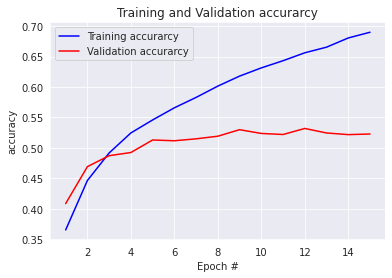

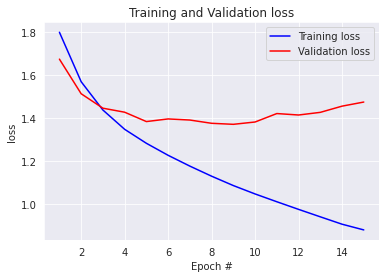

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history object
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()


plt.show()

In [24]:
y_pred_lenet5 = lenet5.predict(x_test)
y_pred_lenet5

array([[1.5092392e-04, 9.0346643e-04, 1.7869096e-03, ..., 8.9647702e-04,
        2.9057493e-03, 1.9563192e-03],
       [1.2277158e-03, 4.3987956e-02, 9.0186321e-04, ..., 1.6987260e-05,
        6.6171873e-01, 2.9131430e-01],
       [1.3499643e-01, 8.2791224e-03, 3.8993617e-03, ..., 2.6530635e-03,
        6.7431188e-01, 1.4277604e-01],
       ...,
       [1.1448438e-02, 1.5873133e-04, 6.3560295e-01, ..., 2.9333580e-02,
        4.7456123e-02, 1.9811042e-02],
       [1.7226453e-01, 1.6459370e-03, 6.2551431e-02, ..., 5.7671305e-02,
        2.1305988e-03, 1.2334283e-03],
       [3.2345470e-02, 4.1970387e-05, 3.0727107e-02, ..., 5.9355164e-01,
        1.4564333e-03, 2.5865110e-03]], dtype=float32)

- Architecture-2 gives the highest training and test accuracy of 91.14% and 63.09% respectively
